In [160]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from unidecode import unidecode
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import settings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### FEATURES PREPROCESS AND DATA SPLIT

In [161]:
df_data_target = pd.read_pickle("df_data_target")

In [162]:
df_data_features = pd.read_pickle("df_data_features")

In [163]:
df_data_features

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,ALL_INCOMES
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,900.00
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,750.00
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,500.00
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,500.00
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,C,10,0,0,1,F,1,2,0,...,0,0,0,0,1,N,36,591,591,1451.00
49996,49997,C,25,0,0,1,F,1,0,0,...,0,0,0,0,2,N,21,186,186,450.00
49997,49998,C,5,Web,0,1,M,2,3,0,...,0,0,0,0,1,N,41,715,715,1555.00
49998,49999,C,1,Web,0,1,F,1,1,0,...,0,0,0,0,1,N,28,320,320,1443.27


In [164]:
#features
features = df_data_features.copy()

#target
target = df_data_target.copy()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100, stratify=target)

In [165]:
X_train

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,...,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,ALL_INCOMES
37413,37414,C,5,Web,0,1,F,1,1,0,...,0,0,0,0,1,N,31,684,684,1072.7
4369,4370,C,10,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,44,583,583,300.0
40736,40737,C,25,Web,0,1,F,4,0,0,...,0,0,0,0,2,N,55,628,628,350.0
43938,43939,C,5,0,0,1,F,2,0,0,...,0,0,0,0,1,N,53,596,596,1717.0
17804,17805,C,1,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,38,419,419,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,1840,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,26,686,686,442.0
46484,46485,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,35,547,547,436.0
7967,7968,C,15,0,0,1,M,2,1,0,...,0,0,0,0,1,N,22,685,685,260.0
33212,33213,C,10,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,50,608,608,300.0


In [166]:
X_train.drop(columns=settings.columns_drop, inplace=True)

In [167]:
#MARITAL_STATUS -> Convert 0 to nan (0,4% of the data)
X_train.loc[X_train["MARITAL_STATUS"]==0, "MARITAL_STATUS"]= np.nan

#QUANT_DEPENDANTS -> value 53 convert it to 15 due to be considered as an outier
X_train.loc[X_train["QUANT_DEPENDANTS"]>=7, "QUANT_DEPENDANTS"]=7

#STATE_OF_BIRTH -> replace "XX" value with nan so as to complete with SimpleImputer
X_train.loc[X_train["STATE_OF_BIRTH"] == "XX", "STATE_OF_BIRTH"]= np.nan
X_train.loc[X_train["STATE_OF_BIRTH"] == " ", "STATE_OF_BIRTH"]= np.nan

#NACIONALITY
X_train.loc[X_train["NACIONALITY"]==2, "NACIONALITY"]=0

#MONTHS_IN_RESIDENCE ->  values 228 and 200 convert it to 101 due to be considered as an outier
# -> I treat outliers with IQR method
q1=np.quantile(X_train.MONTHS_IN_RESIDENCE, 0.25)
q3=np.quantile(X_train.MONTHS_IN_RESIDENCE, 0.75)
iqr=q3-q1
upper_lim=q3+1.5*iqr
lower_lim=q1-1.5*iqr
X_train["MONTHS_IN_RESIDENCE"]=np.where(X_train["MONTHS_IN_RESIDENCE"]>upper_lim, upper_lim, np.where(X_train["MONTHS_IN_RESIDENCE"]<lower_lim, lower_lim,X_train["MONTHS_IN_RESIDENCE"]))

#ALL_INCOMES -> to integer
# -> I treat outliers with IQR
X_train["ALL_INCOMES"] = X_train["ALL_INCOMES"].astype(int)
q1=np.quantile(X_train.ALL_INCOMES, 0.25)
q3=np.quantile(X_train.ALL_INCOMES, 0.75)
iqr=q3-q1
upper_lim=q3+1.5*iqr
lower_lim=q1-1.5*iqr
X_train["ALL_INCOMES"]=np.where(X_train["ALL_INCOMES"]>upper_lim, upper_lim, np.where(X_train["ALL_INCOMES"]<lower_lim, lower_lim,X_train["ALL_INCOMES"]))

#PERSONAL_ASSETS_VALUE -> to integer
#-> I treat outliers with IQR
X_train["PERSONAL_ASSETS_VALUE"] = X_train["PERSONAL_ASSETS_VALUE"].astype(int)
q1=np.quantile(X_train.PERSONAL_ASSETS_VALUE, 0.25)
q3=np.quantile(X_train.PERSONAL_ASSETS_VALUE, 0.75)
iqr=q3-q1
upper_lim=q3+1.5*iqr
lower_lim=q1-1.5*iqr
X_train["PERSONAL_ASSETS_VALUE"]=np.where(X_train["PERSONAL_ASSETS_VALUE"]>upper_lim, upper_lim, np.where(X_train["PERSONAL_ASSETS_VALUE"]<lower_lim, lower_lim,X_train["PERSONAL_ASSETS_VALUE"]))

#AGE -> impute those with ages of 6,7,14 to 17
X_train.loc[X_train["AGE"] < 17, "AGE"]=17

#RESIDENCIAL_ZIP_3 -> as int and replace #DIV/0! value with 0
X_train.loc[X_train["RESIDENCIAL_ZIP_3"] == "#DIV/0!", "RESIDENCIAL_ZIP_3"]= np.nan

#TARGET_LABEL_BAD=1 -> as int 
#df_data_target["TARGET_LABEL_BAD=1"] = "TARGET"
target["TARGET_LABEL_BAD=1"] = target["TARGET_LABEL_BAD=1"].astype(np.int64)

In [168]:
numerical_features = [
"MONTHS_IN_RESIDENCE",
"ALL_INCOMES",
"PERSONAL_ASSETS_VALUE",
"QUANT_CARS",
"AGE"
]

categorical_features = [
"SEX",
"STATE_OF_BIRTH",
"RESIDENCIAL_STATE",
"FLAG_RESIDENCIAL_PHONE",
"COMPANY",
"FLAG_PROFESSIONAL_PHONE",
"RESIDENCIAL_ZIP_3",
]

numeric_categ_features = list(X_train.columns.drop(numerical_features+categorical_features))

In [169]:
len(numeric_categ_features+numerical_features+categorical_features)

26

In [170]:
# Pipeline for numeric features
##imput all and scale

numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ("standarization", StandardScaler())
])

# Pipeline for categorical features
string_pipeline_catnum = Pipeline( steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore', sparse=False, drop='if_binary')),
])


string_pipeline_cat = Pipeline( steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode2', OneHotEncoder(handle_unknown='ignore', sparse=False, drop='if_binary')),
])

# We merge both pipeline into one single pre-processing object
# We use ColumnTransformer for this
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline,  numerical_features),
    ('string1', string_pipeline_catnum, categorical_features),
    ('string2', string_pipeline_cat, numeric_categ_features),
])

In [12]:
#Define X_train preprossed
X_train_prep = full_processor.fit_transform(X_train)

In [13]:
X_train_prep.shape

(40000, 886)

In [14]:
#Define X_test preprossed
X_test_prep = full_processor.transform(X_test)

c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In this section we trained some Machine Learning models:
- LogisticRegression
- RandomForestClassifier
- LGBMClassifier
- XGBoostClassifier
- MLP deep learning model

Also tried to improve some of their results applying RandomizedSearchCV for searching for the best hyperparameters. 

For each model trained you will see the corresponding classification reports for train and test, and the roc-auc score. This last metric was not calculated for the MLP model as their results were not representative for comparing with the other models.  

### LOGISTIC REGRESSION

In [15]:
lr_model = LogisticRegression(max_iter=20000)

lr_model.fit(X_train_prep,y_train)

c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=20000)

In [16]:
X_train_prep.shape

(40000, 886)

In [17]:
lr_pred_train = lr_model.predict(X_train_prep)

In [18]:
lr_pred_test = lr_model.predict(X_test_prep)

In [19]:
print(classification_report(y_train, lr_pred_train))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85     29567
           1       0.55      0.06      0.10     10433

    accuracy                           0.74     40000
   macro avg       0.65      0.52      0.47     40000
weighted avg       0.70      0.74      0.65     40000



In [20]:
print(classification_report(y_test, lr_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.97      0.84      7392
           1       0.44      0.06      0.10      2608

    accuracy                           0.74     10000
   macro avg       0.59      0.52      0.47     10000
weighted avg       0.67      0.74      0.65     10000



In [21]:
predlr=lr_model.predict_proba(X_test_prep)[:, 1]
lr_roc_auc =roc_auc_score(y_test, predlr)
lr_roc_auc

0.6422789809244946

### LOGISTIC REGRESSION + RandomizedSearchCV

In [22]:
param_lr = {
     "max_iter": (100,200,500),
     "tol": (1e-4,1e-5,1e-3,1e-2),
     "C": (0.1,1,10,20)
}

In [23]:
lr_model2 = RandomizedSearchCV(LogisticRegression(random_state=100), param_lr, n_iter=20, random_state=100, cv=4,n_jobs=-1,verbose=1)

lr_model2 .fit(X_train_prep,y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomizedSearchCV(cv=4, estimator=LogisticRegression(random_state=100),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'C': (0.1, 1, 10, 20),
                                        'max_iter': (100, 200, 500),
                                        'tol': (0.0001, 1e-05, 0.001, 0.01)},
                   random_state=100, verbose=1)

In [24]:
lr_pred_train2 = lr_model2.predict(X_train_prep)

In [25]:
lr_pred_test2 = lr_model2.predict(X_test_prep)

In [26]:
print(classification_report(y_train, lr_pred_train2))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85     29567
           1       0.52      0.02      0.04     10433

    accuracy                           0.74     40000
   macro avg       0.63      0.51      0.44     40000
weighted avg       0.69      0.74      0.64     40000



In [27]:
print(classification_report(y_test, lr_pred_test2))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      7392
           1       0.47      0.03      0.05      2608

    accuracy                           0.74     10000
   macro avg       0.60      0.51      0.45     10000
weighted avg       0.67      0.74      0.64     10000



In [29]:
predlr2=lr_model2.predict_proba(X_test_prep)[:, 1]
lr_roc_auc =roc_auc_score(y_test, predlr2)
lr_roc_auc

0.6406144700455476

### RANDOM FOREST CLASSIFIER

In [30]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train_prep,y_train)

C:\Users\Maru\AppData\Local\Temp\ipykernel_13588\2563246073.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_prep,y_train)


RandomForestClassifier()

In [31]:
rf_pred_train = rf_model.predict(X_train_prep)

In [32]:
rf_pred_test = rf_model.predict(X_test_prep)

In [33]:
print(classification_report(y_train, rf_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29567
           1       1.00      1.00      1.00     10433

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



In [34]:
print(classification_report(y_test, rf_pred_test))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      7392
           1       0.41      0.03      0.05      2608

    accuracy                           0.74     10000
   macro avg       0.58      0.51      0.45     10000
weighted avg       0.66      0.74      0.64     10000



In [35]:
predrf=rf_model.predict_proba(X_test_prep)[:, 1]
lr_roc_auc =roc_auc_score(y_test, predrf)
lr_roc_auc

0.6196716874319443

#### RANDOM FOREST CLASSIFIER + RandomizedSearchCV

In [36]:
param_dist = {
     'criterion': ('gini', 'entropy'),
     'n_estimators':  np.random.randint(1,100,20),
     'max_depth': np.random.randint(1,15,10),
     'max_features': ('auto', 'log2'),
     'min_samples_split': np.random.randint(1,15,10),
     'min_samples_leaf': np.random.randint(1,15,10)
}

In [37]:
rf_model2 = RandomizedSearchCV(RandomForestClassifier(random_state=100), param_dist, n_iter=20, random_state=100, cv=4,n_jobs=-1,verbose=1)

rf_model2.fit(X_train_prep,y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
8 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "c:\Users\Maru\Documents\Anyone_ai\project\FINAL_P

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=100),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': array([14,  4,  3,  5,  7, 11,  1,  6,  6,  5]),
                                        'max_features': ('auto', 'log2'),
                                        'min_samples_leaf': array([14,  3, 10, 12,  2, 14,  3,  8,  9, 11]),
                                        'min_samples_split': array([14, 13,  1,  3, 14,  5,  2,  2,  6, 13]),
                                        'n_estimators': array([23, 91, 68, 57,  3, 87, 26, 83, 38, 15, 65, 71, 14, 38, 82, 94, 43,
       38,  6,  9])},
                   random_state=100, verbose=1)

In [38]:
rf_pred_train2 = rf_model2.predict(X_train_prep)

In [39]:
rf_pred_test2 = rf_model2.predict(X_test_prep)

In [40]:
print(classification_report(y_train, rf_pred_train2))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     29567
           1       0.00      0.00      0.00     10433

    accuracy                           0.74     40000
   macro avg       0.37      0.50      0.43     40000
weighted avg       0.55      0.74      0.63     40000



c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [41]:
print(classification_report(y_test, rf_pred_test2))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      7392
           1       0.00      0.00      0.00      2608

    accuracy                           0.74     10000
   macro avg       0.37      0.50      0.43     10000
weighted avg       0.55      0.74      0.63     10000



c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [42]:
predrf2=rf_model2.predict_proba(X_test_prep)[:, 1]
lr_roc_auc =roc_auc_score(y_test, predrf)
lr_roc_auc

0.6196716874319443

### LGBM CLASSIFIER

In [43]:
lgbm_model = lgb.LGBMClassifier(random_state=100)


lgbm_model.fit(X_train_prep,y_train)

c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(random_state=100)

In [44]:
lgbm_pred_train = lgbm_model.predict(X_train_prep)

In [45]:
lgbm_pred_test = lgbm_model.predict(X_test_prep)

In [46]:
print(classification_report(y_train, lgbm_pred_train))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     29567
           1       0.86      0.06      0.11     10433

    accuracy                           0.75     40000
   macro avg       0.80      0.53      0.48     40000
weighted avg       0.78      0.75      0.66     40000



In [47]:
print(classification_report(y_test, lgbm_pred_test))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      7392
           1       0.59      0.04      0.07      2608

    accuracy                           0.74     10000
   macro avg       0.67      0.51      0.46     10000
weighted avg       0.71      0.74      0.65     10000



In [48]:
predlgbm=lgbm_model.predict_proba(X_test_prep)[:, 1]
lr_roc_auc =roc_auc_score(y_test, predlgbm)
lr_roc_auc

0.6476170713073992

### LGBM CLASSIFIER + RandomizedSearchCV

In [49]:
#weights = np.linspace(0.0,0.99,15)
lgbm_params = {
        'bagging_fraction':(0.3,0.6,0.8,1),
        'feature_fraction': (0.3,0.5,0.8,1),
        'max_depth': np.random.randint(5, 200,10),
        'min_data_in_leaf': np.random.randint(5, 100,10),
        'num_leaves': np.random.randint(5, 100,10)
}

In [50]:
lgbm2_model = RandomizedSearchCV(lgb.LGBMClassifier(random_state=100),scoring='roc_auc', param_distributions=lgbm_params, cv = 5, n_iter = 5,verbose=1) 
lgbm2_model.fit(X_train_prep,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=88, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=88
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=100), n_iter=5,
                   param_distributions={'bagging_fraction': (0.3, 0.6, 0.8, 1),
                                        'feature_fraction': (0.3, 0.5, 0.8, 1),
                                        'max_depth': array([ 81, 120,  55,  84,  74,  62,   6,  12,  31,  26]),
                                        'min_data_in_leaf': array([28, 25, 87, 97, 38, 88,  9, 95, 48, 28]),
                                        'num_leaves': array([89, 25,  9, 51, 35, 24, 30,  6, 78, 99])},
                   scoring='roc_auc', verbose=1)

In [51]:
lgbm2_pred_train = lgbm2_model.predict(X_train_prep)

In [52]:
lgbm2_pred_test = lgbm2_model.predict(X_test_prep)

In [53]:
print(classification_report(y_train, lgbm2_pred_train))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     29567
           1       0.83      0.06      0.10     10433

    accuracy                           0.75     40000
   macro avg       0.79      0.53      0.48     40000
weighted avg       0.77      0.75      0.66     40000



In [54]:
print(classification_report(y_test, lgbm2_pred_test))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      7392
           1       0.52      0.03      0.05      2608

    accuracy                           0.74     10000
   macro avg       0.63      0.51      0.45     10000
weighted avg       0.69      0.74      0.64     10000



In [55]:
predlgbm2=lgbm2_model.predict_proba(X_test_prep)[:, 1]
lr_roc_auc =roc_auc_score(y_test, predlgbm2)
lr_roc_auc

0.6476447707934959

### XGBOOST

In [56]:
xgb_model = XGBClassifier()

xgb_model.fit(X_train_prep, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [57]:
xgb_pred_train = xgb_model.predict(X_train_prep)

In [58]:
xgb_pred_test = xgb_model.predict(X_test_prep)

In [59]:
print(classification_report(y_train, xgb_pred_train))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86     29567
           1       0.89      0.13      0.23     10433

    accuracy                           0.77     40000
   macro avg       0.83      0.56      0.55     40000
weighted avg       0.80      0.77      0.70     40000



In [60]:
print(classification_report(y_test, xgb_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85      7392
           1       0.46      0.06      0.10      2608

    accuracy                           0.74     10000
   macro avg       0.60      0.52      0.47     10000
weighted avg       0.67      0.74      0.65     10000



In [61]:
predxgb=xgb_model.predict_proba(X_test_prep)[:, 1]
xgb_roc_auc =roc_auc_score(y_test, predxgb)
xgb_roc_auc

0.6411585522733911

In [62]:
predxgb

array([0.1381189 , 0.22447872, 0.19436836, ..., 0.2577036 , 0.20535208,
       0.3336012 ], dtype=float32)

In [63]:
predxgb[predxgb >= 0.27] = 1
predxgb[predxgb < 0.27] = 0


In [64]:
print(classification_report(y_test, predxgb))

              precision    recall  f1-score   support

           0       0.81      0.63      0.71      7392
           1       0.35      0.57      0.43      2608

    accuracy                           0.61     10000
   macro avg       0.58      0.60      0.57     10000
weighted avg       0.69      0.61      0.63     10000



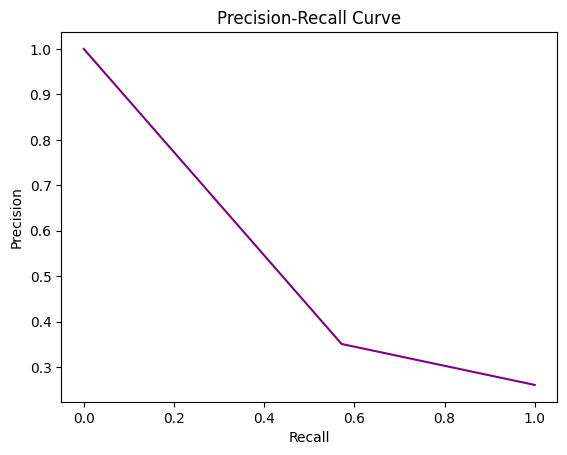

In [65]:
precision, recall, thresholds = precision_recall_curve(y_test, predxgb)
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


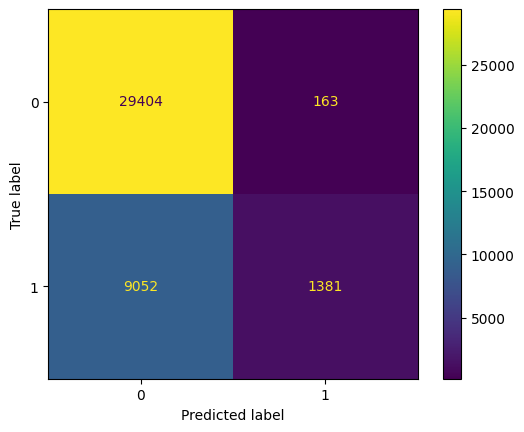

In [66]:
plot_confusion_matrix(xgb_model, X_train_prep, y_train)

c:\Users\Maru\Documents\Anyone_ai\project\FINAL_PROJECT\final_project\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


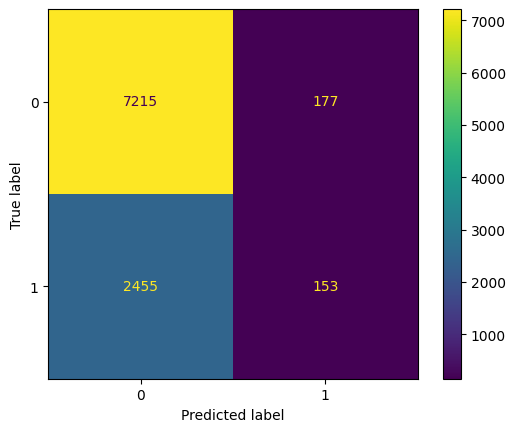

In [67]:
plot_confusion_matrix(xgb_model, X_test_prep, y_test)

False Positive Rate and False Negative Rate against the Threshold

[0.00000000e+00 0.00000000e+00 2.70562771e-04 ... 9.98106061e-01
 9.98376623e-01 1.00000000e+00]
[0.00000000e+00 3.83435583e-04 3.83435583e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


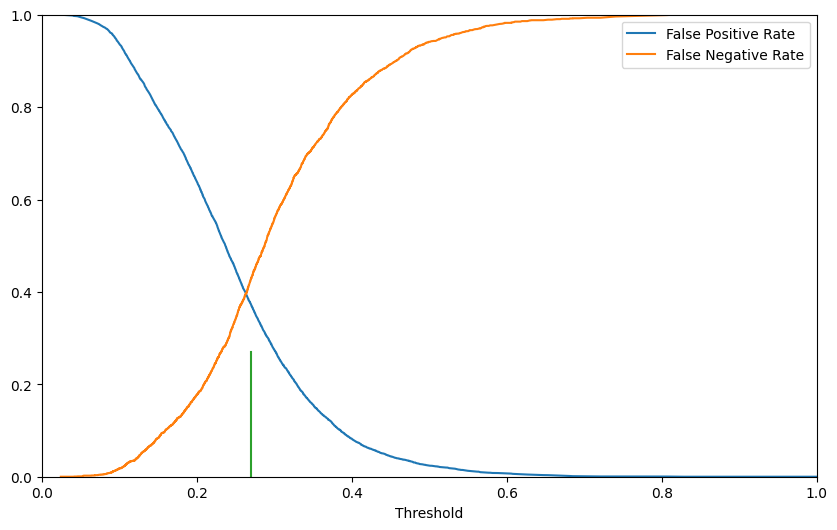

In [68]:
predxgb=xgb_model.predict_proba(X_test_prep)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, predxgb)
print(fpr)
print(tpr)
dfplot=pd.DataFrame({'Threshold':thresholds,'False Positive Rate':fpr,'False Negative Rate': 1.-tpr})
ax=dfplot.plot(x='Threshold', y=['False Positive Rate','False Negative Rate'], figsize=(10,6))
ax.plot([0.27,0.27],[0,0.27]) 
ax.set_xbound(0,1); ax.set_ybound(0,1) 

### XGBOOST + RandomizedSearchCV - EXPERIMENT 1

In [69]:
xgb2_params = {
        'max_depth': (3,10),
        'learning_rate': (0.1,0.01),
        'n_estimators': (100, 150),
        'gamma': (0,0.001),
        'eta': (0.01,0.1),
        'subsample': (0.6,0.8),
        'reg_alpha': (0.005,0.001,0)
}

In [70]:
xgb2_model = RandomizedSearchCV(XGBClassifier(random_state=100), scoring='roc_auc', param_distributions=xgb2_params, cv=5, random_state=100, n_jobs=-1, n_iter=5,verbose=1)

xgb2_model.fit(X_train_prep,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=100, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'eta': (0.01, 0.1), 'gamma': (0, 0.001),
                                        'learning_rate': (0.1, 0.01),
                                        'max_depth': (3, 10),
                                        'n_estimators': (100, 150),
                                        'reg_alpha': (0.005, 0.001, 0),
                                        'subsample': (0.6, 0.8)},
                   random_state=100, scoring='roc_auc', verbose=1)

In [71]:
xgb2_pred_train = xgb2_model.predict(X_train_prep)

In [72]:
xgb2_pred_test = xgb2_model.predict(X_test_prep)

In [73]:
print(classification_report(y_train, xgb2_pred_train))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     29567
           1       0.76      0.01      0.03     10433

    accuracy                           0.74     40000
   macro avg       0.75      0.51      0.44     40000
weighted avg       0.75      0.74      0.64     40000



In [74]:
print(classification_report(y_test, xgb2_pred_test))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      7392
           1       0.62      0.01      0.02      2608

    accuracy                           0.74     10000
   macro avg       0.68      0.50      0.44     10000
weighted avg       0.71      0.74      0.63     10000



In [75]:
predxgb2=xgb2_model.predict_proba(X_test_prep)[:, 1]
xgb2_roc_auc =roc_auc_score(y_test, predxgb2)
xgb2_roc_auc

0.6434438636197648

### XGBOOST + RandomizedSearchCV - EXPERIMENT 2

In [76]:
xgb2_params2 = {
            "learning_rate": (0.01, 0.1), 
            "n_estimators": np.arange(100,200),
            "max_depth": np.arange(1,25,5),
            #"min_child_weight": (0,1),
            "gamma": (0,0.001,0.01),
            "subsample": (0.5,0.7,1),
            "colsample_bytree": (0.8,1),
            "nthread": (1,3),
}

In [77]:
xgb2_model2 = RandomizedSearchCV(XGBClassifier(random_state=100),scoring='roc_auc',param_distributions=xgb2_params2, n_iter=5, random_state=100, cv=5,n_jobs=-1,verbose=1)
xgb2_model2.fit(X_train_prep,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199]),
                                        'nthread': (1, 3),
                                        'subsample': (0.5, 0.7, 1)},
                   random_state=100, scoring='roc_auc', verbose=1)

In [78]:
xgb2_pred_train2 = xgb2_model2.predict(X_train_prep)

In [79]:
xgb2_pred_test2 = xgb2_model2.predict(X_test_prep)

In [80]:
print(classification_report(y_train, xgb2_pred_train2))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87     29567
           1       0.99      0.18      0.31     10433

    accuracy                           0.79     40000
   macro avg       0.88      0.59      0.59     40000
weighted avg       0.83      0.79      0.73     40000



In [81]:
print(classification_report(y_test, xgb2_pred_test2))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85      7392
           1       0.47      0.05      0.09      2608

    accuracy                           0.74     10000
   macro avg       0.61      0.52      0.47     10000
weighted avg       0.67      0.74      0.65     10000



In [82]:
predxgb22=xgb2_model2.predict_proba(X_test_prep)[:, 1]
xgb2_roc_auc2 =roc_auc_score(y_test, predxgb22)
xgb2_roc_auc2

0.6418344923545268

### MLP

In [146]:
model_mlp = keras.Sequential()
model_mlp.add(layers.Dense(480, input_dim=886, activation='relu'))
model_mlp.add(layers.Dense(125, activation='relu'))
model_mlp.add(layers.Dense(250, activation='relu'))
model_mlp.add(layers.Dense(80, activation='relu'))
model_mlp.add(layers.Dense(2, activation='softmax'))

model_mlp.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 480)               425760    
                                                                 
 dense_51 (Dense)            (None, 125)               60125     
                                                                 
 dense_52 (Dense)            (None, 250)               31500     
                                                                 
 dense_53 (Dense)            (None, 80)                20080     
                                                                 
 dense_54 (Dense)            (None, 2)                 162       
                                                                 
Total params: 537,627
Trainable params: 537,627
Non-trainable params: 0
_________________________________________________________________


In [150]:
model_mlp.compile(
  loss='sparse_categorical_crossentropy', 
  optimizer='adam',
  metrics=['accuracy'],
)

In [151]:
early_stopping = keras.callbacks.EarlyStopping(
patience=5,
min_delta=0.001,
restore_best_weights=True,
)

In [152]:
model_mlp.fit(
  X_train_prep, 
  y_train, 
  epochs=50, 
  batch_size=32, 
  validation_split=0.2,
  callbacks=[early_stopping]
)

Epoch 1/50
1000/1000 [==============================] - 8s 6ms/step - loss: 0.5442 - accuracy: 0.7388 - val_loss: 0.5469 - val_accuracy: 0.7435
Epoch 2/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5269 - accuracy: 0.7464 - val_loss: 0.5628 - val_accuracy: 0.7389
Epoch 3/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.4972 - accuracy: 0.7636 - val_loss: 0.5915 - val_accuracy: 0.6946
Epoch 4/50
1000/1000 [==============================] - 6s 6ms/step - loss: 0.4534 - accuracy: 0.7884 - val_loss: 0.6086 - val_accuracy: 0.7171
Epoch 5/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.3961 - accuracy: 0.8176 - val_loss: 0.7112 - val_accuracy: 0.6933
Epoch 6/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.3367 - accuracy: 0.8486 - val_loss: 0.8184 - val_accuracy: 0.6991


In [93]:
#loss is increasing in validation dataset and accuracy decreasing so its not a good model

In [153]:
mlp_pred_train = model_mlp.predict(X_train_prep)

1250/1250 [==============================] - 3s 2ms/step


In [154]:
y_pred_bool = np.argmax(mlp_pred_train, axis=1)

In [155]:
print(classification_report(y_train, y_pred_bool))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     29567
           1       0.79      0.01      0.02     10433

    accuracy                           0.74     40000
   macro avg       0.77      0.50      0.43     40000
weighted avg       0.75      0.74      0.63     40000



In [156]:
mlp_pred_test = model_mlp.predict(X_test_prep)

313/313 [==============================] - 1s 2ms/step


In [157]:
y_pred_bool_test = np.argmax(mlp_pred_test, axis=1)

In [159]:
print(classification_report(y_test, y_pred_bool_test))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      7392
           1       0.44      0.01      0.01      2608

    accuracy                           0.74     10000
   macro avg       0.59      0.50      0.43     10000
weighted avg       0.66      0.74      0.63     10000

